## K-Nearest Neighbors in Python

### By Thomas Oswald

#### Spring 2020, Data 4319

K Nearest Neighbors is an algorithm that classifies objects based on the similarity of their measurements. So, in this notebook, the KNN algorithm will classify a data point based on how its neighbors are classified.  We will perform this supervised learning on the IRIS data set.

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math

#### Preview of the IRIS data set

In [2]:
data = pd.read_csv('iris_data.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Create a subset to perform KNN on

In [3]:
# Read in the Iris Dataset csv
data = pd.read_csv('iris_data.csv')
data = data.drop(['PetalWidth'], axis = 1)

# Create a subset dataframe from which testing is derived from
X = data.drop(['Species'], axis = 1).values
Y = data.drop(['SepalLength', 'SepalWidth','PetalLength'], axis = 1).values

#### Plot Iris measurements and observe clusters of data

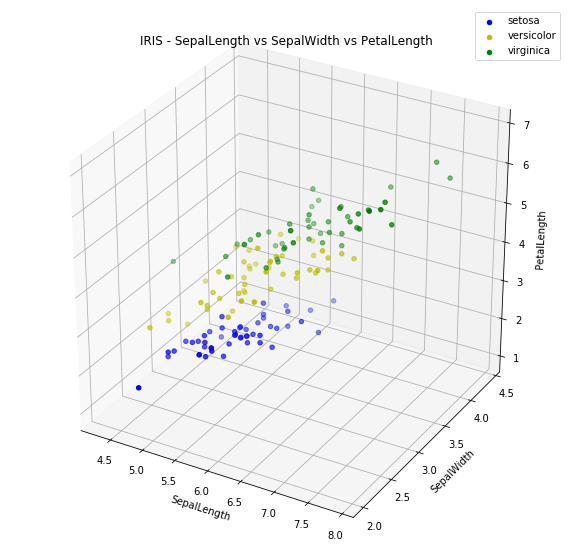

In [5]:
# The following subsets are just for plotting
x1 = np.asarray(X[0:50,0],np.float)  # SepalLength
y1 = np.asarray(X[0:50,1],np.float)  # SepalWidth
z1 = np.asarray(X[0:50,2],np.float)  # PetalLength

x2 = np.asarray(X[50:100,0],np.float)
y2 = np.asarray(X[50:100,1],np.float)
z2 = np.asarray(X[50:100,2],np.float)

x3 = np.asarray(X[100:150,0],np.float)
y3 = np.asarray(X[100:150,1],np.float)
z3 = np.asarray(X[100:150,2],np.float)

# Begin plotting
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1,
           y1,
           z1,
           c='blue',
           label = "setosa")
ax.scatter(x2,
           y2,
           z2,
           c='y',
           label = "versicolor")
ax.scatter(x3,
           y3,
           z3,
           c='green',
           label = "virginica")

plt.title('IRIS - SepalLength vs SepalWidth vs PetalLength')
ax.set_xlabel('SepalLength')
ax.set_ylabel('SepalWidth')
ax.set_zlabel('PetalLength')
ax.legend()

We can see three clusters of points in this plot. Now, we will define functions so that we can perform the K-Nearest Algorithm on data points so that they can be classified based on their neighbors classification. 
First we will need to calculate a eucledian distance for each point. The Euclidean distance is the straightline distance between two points in Euclidean space. With Euclidean ditance, we can perform K-Nearest Neighbors.

### Define Essential Functions

In [6]:
def euclidean_distance(p1, p2):
    euc = 0
    for i in range(len(p1)):
        euc += math.sqrt( (p1[i] - p2[i])**2 )
    
    # return the measured euclidean distance between 2 equal dimensional points
    return euc

def KNN(point, x, y, k):
    # Calculate the distance between the given 'point' and all other points in X
    # y is the species identifier
    # k is the number of reference for the point
    
    distance_array  = []
    for i in range(len(x)):
        if not all(x[i]) != all(point):
            distance_array.append( [ x[i], y[i][0], euclidean_distance(point, x[i]) ] )
    
    # Sort the array in ascending order according to the euclidean distance
    distance_array = sorted(distance_array, key = lambda j : j[2])
    
    return distance_array[0:k-1]

def predict(index, x, y, k):
    point = X[index]
    neighbors = KNN(x[index], x, y, k)
    
    setosa_count = 0
    versicolor_count = 0 
    virginica_count = 0
    
    for i in range(k-1):
        if neighbors[i][1] == 'setosa':
            setosa_count += 1
        elif neighbors[i][1] == 'versicolor':
            versicolor_count += 1
        else:
            virginica_count += 1
            
    predict_df = pd.DataFrame([[setosa_count/(k-1),
                                versicolor_count/(k-1),
                                virginica_count/(k-1)]],
                              columns = ['Setosa Probability','Versicolor Probability','Virginica Probability'])

    # add the target point
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(x1,
               y1,
               z1,
               c='blue',
               s= 30,
              label = "setosa")
    ax.scatter(x2,
               y2,
               z2,
               c='y',
               s= 30,
               label = "versicolor")
    ax.scatter(x3,
               y3,
               z3,
               c='green',
               s= 30,
               label = "virginica")
    
    ax.scatter(point[0],
                point[1],
                point[2],
                c='red',
                marker = 'x',
                s = 100,
                label = "target")

    plt.title('IRIS - SepalLength vs SepalWidth vs PetalLength')
    ax.set_xlabel('SepalLength')
    ax.set_ylabel('SepalWidth')
    ax.set_zlabel('PetalLength')
    ax.legend()
    
    return predict_df

## Testing

,Setosa Probability,Versicolor Probability,Virginica Probability
0,0.0,0.166667,0.833333


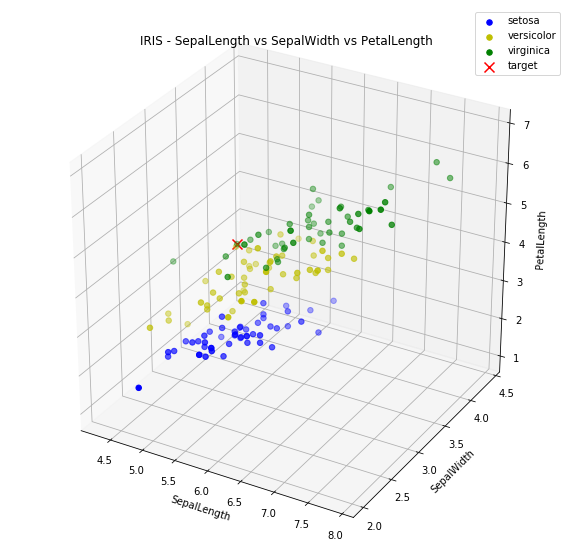

In [7]:
predict(121,X,Y,7)

In Summary, the K-Nearest neighbors algorithm is simple, supervised machine learning algorithm for classification problems. The use of the euclidean distance function is essential in calculating the distance between any given point and its nearest neighbors, then using their prior classifications to classify the given point.

A short coming of this approach is that each data point needs its euclidean distance calculated, so the larger the data set, the longer the computational time. Another short coming would be the testing behind finding an appropriate 'K' value. The larger the 'K', the more computational time.